#### Combinatorics 

**Author**: J. Hickman

If the feature set is small then we can iterator over all possible combinations of feature subsets 

However,for large data-sets this becomes impractical.

This can be iteration can be done with the following python code

In [2]:
#modified from: https://stackoverflow.com/questions/464864/how-to-get-all-possible-combinations-of-a-list-s-elements
import itertools
n_features=8
list1 = [*range(1,n_features+1)]; 
print("list1 =",list1)
count=0
for L in range(1,len(list1) + 1):
    for subset in itertools.combinations(list1, L):
        #print(list(subset))
        count+=1
print("number of subsets =",count)

list1 = [1, 2, 3, 4, 5, 6, 7, 8]
number of subsets = 255


In [7]:
# EXPECTED 
#x1
#x2
#x3
#x4
#x1,x2 
#x1,x3 
#x1,x4 
#x2,x3 
#x2,x4
#x3,x4
#x1,x2,x3
#x1,x2,x4
#x1,x3,x4
#x1,x2,x3,x4

#### Loop over number of features 

In [8]:
nF=[]
nS=[]
for n_features in range(1,15):
    if(n_features % 5 ==0): print(n_features)
    count=0
    list1 = [*range(1,n_features+1)]; 
    #print("list1 =",list1)
    for L in range(1,len(list1) + 1):
        for subset in itertools.combinations(list1, L):
            #print(list(subset))
            count+=1
    nF.append(n_features)
    nS.append(count)

print(nF); print(nS)

5
10
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[1, 3, 7, 15, 31, 63, 127, 255, 511, 1023, 2047, 4095, 8191, 16383]


In [9]:
# CURVE FIT FOR FUN
import numpy as np
from scipy.optimize import curve_fit
x = np.array(nF)
y = np.array(nS)

def func(x, a, b, c):
    return  a*np.exp(b*(x))+c

initial_parameter_guess=np.array([ 0.45 ,1.1,-1.1])
popt, pcov = curve_fit(func, x, y,p0=initial_parameter_guess,maxfev=2000)
print(popt)
yfit=func(x,popt[0],popt[1],popt[2])

[ 1.          0.69314718 -1.        ]


RMSE: 1.9527554176842644e-12


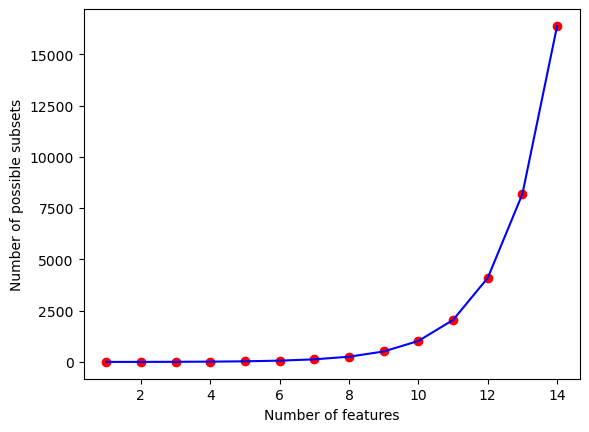

In [10]:
#PLOT-1

import matplotlib.pyplot as plt
plt.plot(nF,nS,'or')
plt.plot(nF,yfit,'-b')
print("RMSE:",np.mean(np.sqrt((nS-yfit)**2.0)))
plt.xlabel('Number of features')
plt.ylabel('Number of possible subsets')
plt.show()
# plt.ion()

